In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

files = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_dir = os.path.join(dirname, filename)
        files.append(file_dir)
        print(f"{os.path.join(dirname, filename)} added to files array")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data5g/2022-07-08-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-07-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-21-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-14-garbo06-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-15-garbo08-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-20-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-08-garbo10-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-22-garbo01-combined-kml.csv added to files array
/kaggle/input/data5g/clean_data.csv added to files array
/kaggle/input/data5g/2022-07-14-garbo11-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-12-garbo01-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-06-garbo10-combined-kml.csv added to files array
/kaggle/input/data5g/2022-07-20-garbo06-combined-kml.csv added to files array
/kaggle

In [2]:
print(len(files))

137


In [3]:
#Data Ingestion & Cleaning
#Filter out Invalid GPS Points & Parse timestamps

cleaned_dataframes = []

for file in files:
    data5G = pd.read_csv(file, low_memory=False) #Read csv file and remove warnings
    #GPS Points 
    data5G = data5G[(data5G['latitude'] != 99999) & (data5G['longitude'] != 99999)] #99,999 is used for invalid detection

    #Parse timestamps 
    data5G['time'] = pd.to_datetime(data5G['time'], unit='s', errors='coerce') #Removes invalid values (abc) and converts numeric values into time and date
    data5G = data5G.dropna(subset=['time']) #Removes rows with invalid timestamps

    cleaned_dataframes.append(data5G)

master_data5G = pd.concat(cleaned_dataframes, ignore_index=True)

master_data5G.to_csv('/kaggle/working/master_data5G.csv', index=False) #Convert to a master csv 

print("Data cleaning completed and saved as'master_data5G.csv'")

    
    

Data cleaning completed and saved as'master_data5G.csv'


In [4]:
#Data Pre-Processing
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/working/master_data5G.csv', low_memory=False) #Read new CSV created


df.head() #Show the first 5 rows


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,time,Day,Year,Month,Date,hour,min,sec,timezone,latitude,...,MONTH,DATE,HOUR,MIN,SEC,upload_transfer_size_mbytes,upload_bitrate_mbits/sec,download_transfer_size_rx_mbytes,download_bitrate_rx_mbits/sec,application_data
0,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-07 19:36:07,Fri,2022.0,7.0,8.0,5.0,36.0,7.0,AEST,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Data structure & types
df.info()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989938 entries, 0 to 4989937
Data columns (total 47 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   time                              object 
 1   Day                               object 
 2   Year                              float64
 3   Month                             float64
 4   Date                              float64
 5   hour                              float64
 6   min                               float64
 7   sec                               float64
 8   timezone                          object 
 9   latitude                          float64
 10  longitude                         float64
 11  speed                             float64
 12  truck                             object 
 13  svr1                              float64
 14  svr2                              float64
 15  svr3                              float64
 16  svr4                              fl

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,time,Day,Year,Month,Date,hour,min,sec,timezone,latitude,...,MONTH,DATE,HOUR,MIN,SEC,upload_transfer_size_mbytes,upload_bitrate_mbits/sec,download_transfer_size_rx_mbytes,download_bitrate_rx_mbits/sec,application_data
count,4989938,2698689,2698689.0,2698689.0,2.698689e+06,2.698688e+06,2.698688e+06,2.698688e+06,2698688,4.646129e+06,...,1947443.0,1.947443e+06,1.947443e+06,1.947443e+06,1.947443e+06,1.947443e+06,1.947443e+06,1.947443e+06,1.947443e+06,1.947443e+06
unique,592403,5,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-07-08 01:47:11,Mon,NaN,NaN,NaN,NaN,NaN,NaN,AEST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,58,590206,NaN,NaN,NaN,NaN,NaN,NaN,2698686,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2022.0,7.0,1.218967e+01,8.817216e+00,2.961934e+01,2.948782e+01,NaN,-3.172453e+01,...,7.0,1.180493e+01,8.913624e+00,2.928138e+01,2.948861e+01,1.001962e+00,8.414011e+00,1.874290e+00,1.572180e+01,3.062905e-01
std,NaN,NaN,0.0,0.0,6.021038e+00,2.308625e+00,1.745151e+01,1.731720e+01,NaN,2.807625e+01,...,0.0,5.906094e+00,2.232742e+00,1.749069e+01,1.731026e+01,9.870801e-01,8.201461e+00,1.892505e+00,1.584072e+01,9.136602e-01
min,NaN,NaN,2022.0,7.0,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,NaN,-3.782882e+01,...,7.0,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,2022.0,7.0,6.000000e+00,7.000000e+00,1.400000e+01,1.400000e+01,NaN,-3.778222e+01,...,7.0,6.000000e+00,7.000000e+00,1.400000e+01,1.500000e+01,0.000000e+00,0.000000e+00,4.140625e-01,3.470000e+00,0.000000e+00
50%,NaN,NaN,2022.0,7.0,1.200000e+01,9.000000e+00,3.000000e+01,2.900000e+01,NaN,-3.775353e+01,...,7.0,1.200000e+01,9.000000e+00,2.900000e+01,2.900000e+01,1.250000e+00,1.050000e+01,1.370000e+00,1.150000e+01,6.170082e-02
75%,NaN,NaN,2022.0,7.0,1.800000e+01,1.100000e+01,4.500000e+01,4.400000e+01,NaN,-3.772264e+01,...,7.0,1.800000e+01,1.100000e+01,4.500000e+01,4.400000e+01,1.250000e+00,1.050000e+01,2.780000e+00,2.330000e+01,2.803278e-01


time                                      0
Day                                 2291249
Year                                2291249
Month                               2291249
Date                                2291249
hour                                2291250
min                                 2291250
sec                                 2291250
timezone                            2291250
latitude                             343809
longitude                            343809
speed                               2291253
truck                               2291255
svr1                                 593975
svr2                                 593975
svr3                                 593975
svr4                                 593977
Role                                2276403
Transfer size                       2276405
Transfer unit                       2276402
Bitrate                             2276405
bitrate_unit                        2276402
Retransmissions                 

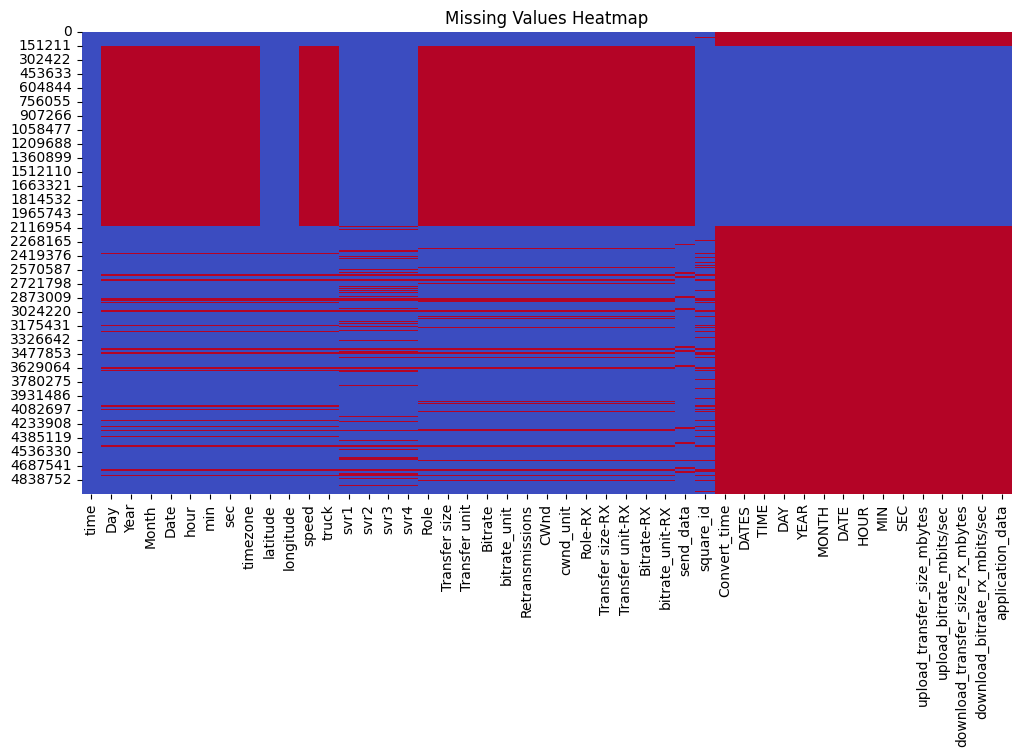

In [6]:
#Total missing values per column
print(df.isnull().sum())

#Visual heatmap of missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm") #Red = Missing, Blue = Present
plt.title("Missing Values Heatmap")
plt.show()
#Need to work out how to remove "clean_data.csv" so there will be less missing values 

In [7]:
#Missing-Value Strategy 
#Check missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

#Drop columns with >60% missing values
threshold = 60
drop_cols = missing_percent[missing_percent > threshold].index
df = df.drop(columns=drop_cols)


In [8]:
#Time series
#Analysing the data
master_data = pd.read_csv('/kaggle/working/master_data5G.csv')

print(master_data.head())
print(master_data.dtypes)

/tmp/ipykernel_31/1308435150.py:3: DtypeWarning: Columns (1,8,12,17,19,21,22,23,24,25,27,29,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  master_data = pd.read_csv('/kaggle/working/master_data5G.csv')


                  time  Day    Year  Month  Date  hour   min  sec timezone  \
0  2022-07-07 19:36:07  Fri  2022.0    7.0   8.0   5.0  36.0  7.0     AEST   
1  2022-07-07 19:36:07  Fri  2022.0    7.0   8.0   5.0  36.0  7.0     AEST   
2  2022-07-07 19:36:07  Fri  2022.0    7.0   8.0   5.0  36.0  7.0     AEST   
3  2022-07-07 19:36:07  Fri  2022.0    7.0   8.0   5.0  36.0  7.0     AEST   
4  2022-07-07 19:36:07  Fri  2022.0    7.0   8.0   5.0  36.0  7.0     AEST   

   latitude  ...  MONTH  DATE HOUR  MIN  SEC  upload_transfer_size_mbytes  \
0      99.0  ...    NaN   NaN  NaN  NaN  NaN                          NaN   
1      99.0  ...    NaN   NaN  NaN  NaN  NaN                          NaN   
2      99.0  ...    NaN   NaN  NaN  NaN  NaN                          NaN   
3      99.0  ...    NaN   NaN  NaN  NaN  NaN                          NaN   
4      99.0  ...    NaN   NaN  NaN  NaN  NaN                          NaN   

   upload_bitrate_mbits/sec download_transfer_size_rx_mbytes  \
0   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [9]:
#One column for date and time
#renamed columns to support conversion
df.rename(columns={
    'Year': 'year',
    'Month': 'month',
    'Date': 'day',
    'hour': 'hour',
    'min': 'minute',
    'sec': 'second'
}, inplace=True)

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df = df.sort_values('datetime')


In [10]:
print(df.columns.tolist())


['time', 'Day', 'year', 'month', 'day', 'hour', 'minute', 'second', 'timezone', 'latitude', 'longitude', 'speed', 'truck', 'svr1', 'svr2', 'svr3', 'svr4', 'Role', 'Transfer size', 'Transfer unit', 'Bitrate', 'bitrate_unit', 'Retransmissions', 'CWnd', 'cwnd_unit', 'Role-RX', 'Transfer size-RX', 'Transfer unit-RX', 'Bitrate-RX', 'bitrate_unit-RX', 'send_data', 'square_id', 'datetime']


In [11]:
from sklearn.preprocessing import MinMaxScaler

target_column = 'svr1'
feature_columns = ['svr2', 'svr3', 'svr4']


df_features = df[feature_columns + [target_column]].dropna()


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df_features.drop(columns=[target_column]))
y_scaled = scaler_y.fit_transform(df_features[[target_column]])


In [12]:
def create_dataset(X, y, lookback=50):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X[i:i+lookback])
        ys.append(y[i+lookback])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_dataset(X_scaled, y_scaled, lookback=50)


#Train/test split
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Baseline models

y_test_flat = y_test.flatten()

#naive forecast
naive_preds = y_test_flat[:-1]
naive_actual = y_test_flat[1:]
naive_rmse = np.sqrt(mean_squared_error(naive_actual, naive_preds))
naive_mae = mean_absolute_error(naive_actual, naive_preds)
print(f"Naive, RMSE: {naive_rmse:.4f}, MAE: {naive_mae:.4f}")

Naive, RMSE: 0.0587, MAE: 0.0235


In [14]:
#Moving average forecast
window = 5
rolling_preds = np.convolve(y_test_flat, np.ones(window)/window, mode='valid')
rolling_actual = y_test_flat[window-1:]
rolling_rmse = np.sqrt(mean_squared_error(rolling_actual, rolling_preds))
rolling_mae = mean_absolute_error(rolling_actual, rolling_preds)
print(f"Moving Average (window={window}), RMSE: {rolling_rmse:.4f}, MAE: {rolling_mae:.4f}")

Moving Average (window=5), RMSE: 0.0513, MAE: 0.0235


In [15]:
#LSTM Model
#define model 
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
#LSTM Model
#create dataset with lookback
lookback = 50
X_seq, y_seq = create_dataset(X_scaled, y_scaled, lookback=lookback)
train_size = int(len(X_seq) * 0.8)

X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                           torch.tensor(y_train, dtype=torch.float32))
test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                          torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=512, shuffle=False)

#initialise model
model = LSTMModel(input_size=X_train.shape[2], hidden_size=64, num_layers=1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [17]:
#LSTM Model
#Train model
for epoch in range(5):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")



Epoch 1, Loss: 86.5080
Epoch 2, Loss: 84.7157
Epoch 3, Loss: 83.5060
Epoch 4, Loss: 82.8753
Epoch 5, Loss: 82.5123


OutOfMemoryError: CUDA out of memory. Tried to allocate 222.28 GiB. GPU 0 has a total capacity of 15.89 GiB of which 3.12 GiB is free. Process 7518 has 12.77 GiB memory in use. Of the allocated memory 12.32 GiB is allocated by PyTorch, and 154.50 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [19]:
#LSTM Model
#Evaluate
#broke predictions into batches to fix out of memory
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

model.eval()
y_pred_batches = []

with torch.no_grad():
    for xb in test_loader:
        xb = xb[0].to(device)
        preds = model(xb).cpu().numpy()
        y_pred_batches.append(preds)

#combine all batches
y_pred = np.vstack(y_pred_batches)

y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
mae = mean_absolute_error(y_test_inv, y_pred_inv)


print(f"LSTM, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

LSTM, RMSE: 139.27, MAE: 74.90


In [20]:
#Hyperparameter tuning of the LSTM model

tuning_results = []

#parameters
lookback_options = [30, 50]
hidden_sizes = [32, 64]
num_layers_list = [1, 2]
learning_rates = [0.001, 0.0005]


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#loop for hyperparameter tuning
for lookback in lookback_options:
    X_seq, y_seq = create_dataset(X_scaled, y_scaled, lookback)
    train_size = int(len(X_seq) * 0.8)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]

    for hidden_size in hidden_sizes:
        for num_layers in num_layers_list:
            for lr in learning_rates:
                print(f"\nTraining: lookback={lookback}, hidden={hidden_size}, layers={num_layers}, lr={lr}")

                #initialise 
                train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                         torch.tensor(y_train, dtype=torch.float32))
                train_loader = DataLoader(train_ds, batch_size=512, shuffle=False)

            
                model = LSTMModel(input_size=X_train.shape[2],
                                  hidden_size=hidden_size,
                                  num_layers=num_layers).to(device)

                optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                criterion = nn.MSELoss()

                #train
                for epoch in range(5):
                    model.train()
                    epoch_loss = 0
                    for xb, yb in train_loader:
                        xb, yb = xb.to(device), yb.to(device)
                        optimizer.zero_grad()
                        pred = model(xb)
                        loss = criterion(pred, yb)
                        loss.backward()
                        optimizer.step()
                        epoch_loss += loss.item()

                    print(f"  Epoch {epoch+1} Loss: {epoch_loss:.4f}")

                #evaluate
                model.eval()
                test_loader = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.float32)), batch_size=512)
                y_pred_batches = []
                with torch.no_grad():
                    for xb in test_loader:
                        xb = xb[0].to(device)
                        pred = model(xb).cpu().numpy()
                        y_pred_batches.append(pred)
                y_pred = np.vstack(y_pred_batches)

                y_pred_inv = scaler_y.inverse_transform(y_pred)
                y_test_inv = scaler_y.inverse_transform(y_test)

                rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
                mae = mean_absolute_error(y_test_inv, y_pred_inv)

                
                tuning_results.append({'lookback': lookback,'hidden_size': hidden_size,'num_layers': num_layers, 'lr': lr, 'rmse': rmse, 'mae': mae})

                print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

results_df = pd.DataFrame(tuning_results)
results_df = results_df.sort_values('rmse')

print("Best combinations:")
display(results_df.head())



Training: lookback=30, hidden=32, layers=1, lr=0.001
  Epoch 1 Loss: 87.1214
  Epoch 2 Loss: 84.5758
  Epoch 3 Loss: 83.8377
  Epoch 4 Loss: 83.4532
  Epoch 5 Loss: 82.9860
RMSE, 138.91, MAE: 72.10

Training: lookback=30, hidden=32, layers=1, lr=0.0005
  Epoch 1 Loss: 90.0915
  Epoch 2 Loss: 85.1657
  Epoch 3 Loss: 84.1041
  Epoch 4 Loss: 83.7150
  Epoch 5 Loss: 83.5441
RMSE, 139.66, MAE: 68.24

Training: lookback=30, hidden=32, layers=2, lr=0.001
  Epoch 1 Loss: 87.3630
  Epoch 2 Loss: 84.8577
  Epoch 3 Loss: 83.6922
  Epoch 4 Loss: 83.1616
  Epoch 5 Loss: 82.7010
RMSE, 139.43, MAE: 74.73

Training: lookback=30, hidden=32, layers=2, lr=0.0005
  Epoch 1 Loss: 86.7203
  Epoch 2 Loss: 84.6696
  Epoch 3 Loss: 83.8728
  Epoch 4 Loss: 83.3296
  Epoch 5 Loss: 82.9445
RMSE, 138.80, MAE: 72.72

Training: lookback=30, hidden=64, layers=1, lr=0.001
  Epoch 1 Loss: 86.5644
  Epoch 2 Loss: 84.6345
  Epoch 3 Loss: 83.6496
  Epoch 4 Loss: 83.1335
  Epoch 5 Loss: 82.8442
RMSE, 138.96, MAE: 74.31

Tr

,lookback,hidden_size,num_layers,lr,rmse,mae
13,50,64,1,0.0005,138.583055,71.119735
7,30,64,2,0.0005,138.756246,72.748773
3,30,32,2,0.0005,138.801348,72.722591
0,30,32,1,0.0010,138.914644,72.097761
5,30,64,1,0.0005,138.939062,72.342247
